<a href="https://colab.research.google.com/github/irinaIvlieva/Neural-networks-lab1/blob/main/Lab1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques

import numpy as np
import matplotlib.pyplot as plt

import os
import pathlib
from zipfile import ZipFile
import PIL

import tensorflow as tf

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16


In [ ]:
import cv2
import os
import glob
import gc
def load_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'**')
        #print(data_path)
        files = [os.path.normpath(i) for i in glob.glob(data_path)]
        #print(files)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img))
            y.append(label)
            n=n+1
        print(n,' loaded')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect()
    return X,y, label, label_names
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!cp /content/drive/MyDrive/archive.zip 
!unzip /content/drive/MyDrive/archive.zip

Mounted at /content/drive
cp: missing destination file operand after '/content/drive/MyDrive/archive.zip'
Try 'cp --help' for more information.
Archive:  /content/drive/MyDrive/archive.zip
replace fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace fruits-360-original-size/fruits-360-original-size/Meta/apple_braeburn_1/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

Images,Labels,N_classes,name_classes = load_images("/content/fruits-360-original-size/fruits-360-original-size/Training", 100, 100, 500)
print("Начинаем загружать тестовый набор")
Images_test,Labels_test,N_classes_test,name_classes_test = load_images("/content/fruits-360-original-size/fruits-360-original-size/Test", 100, 100, 500)
print("Данные успешно загружены")

apple_red_3
281  loaded
apple_rotten_1
319  loaded
apple_golden_3
316  loaded
apple_granny_smith_1
320  loaded
apple_red_2
318  loaded
apple_red_1
309  loaded
cabbage_white_1
96  loaded
apple_golden_1
308  loaded
cucumber_3
163  loaded
apple_braeburn_1
320  loaded
cucumber_1
100  loaded
pear_3
144  loaded
zucchini_1
160  loaded
apple_6
315  loaded
apple_red_yellow_1
308  loaded
apple_crimson_snow_1
318  loaded
apple_golden_2
308  loaded
carrot_1
101  loaded
zucchini_dark_1
160  loaded
eggplant_violet_1
160  loaded
apple_pink_lady_1
313  loaded
apple_hit_1
468  loaded
apple_red_delicios_1
300  loaded
pear_1
326  loaded
Начинаем загружать тестовый набор
apple_red_3
140  loaded
apple_rotten_1
159  loaded
apple_golden_3
158  loaded
apple_granny_smith_1
160  loaded
apple_red_2
159  loaded
apple_red_1
154  loaded
cabbage_white_1
47  loaded
apple_golden_1
154  loaded
cucumber_3
81  loaded
apple_braeburn_1
160  loaded
cucumber_1
50  loaded
pear_3
72  loaded
zucchini_1
80  loaded
apple_6
157  l

In [ ]:
Images.shape

(6231, 100, 100, 3)

In [ ]:
Images_test.shape

(3110, 100, 100, 3)

In [ ]:
Labels

array([ 0,  0,  0, ..., 23, 23, 23])

In [ ]:
Labels_test

array([ 0,  0,  0, ..., 23, 23, 23])

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/fruits-360-original-size/fruits-360-original-size/Training",
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/fruits-360-original-size/fruits-360-original-size/Training",
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)


Found 6231 files belonging to 24 classes.
Using 4985 files for training.
Found 6231 files belonging to 24 classes.
Using 1246 files for validation.
(32, 100, 100, 3)
(32,)


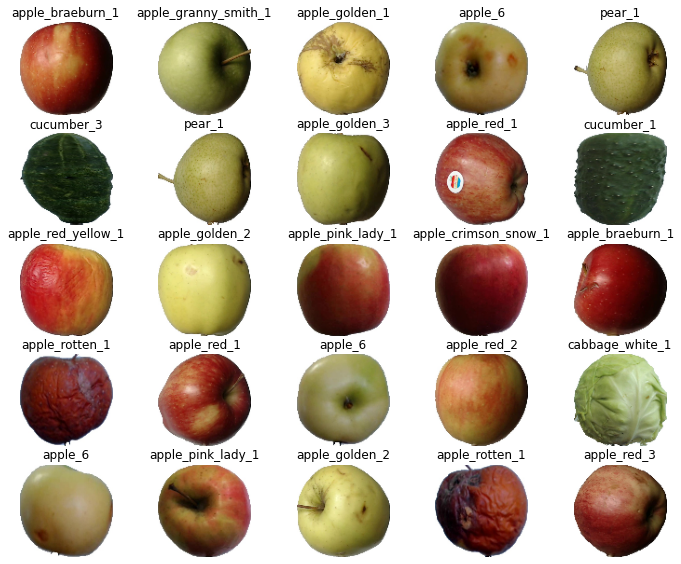

In [ ]:
import random
plt.figure(figsize=(12,20))
for i in range(0,25) :
    plt.subplot(10,5,i+1)
    j = random.randint(0,len(Images))
    plt.axis('off')
    plt.imshow(Images[j])
    plt.title(name_classes[Labels[j]])

In [ ]:
#Создаем модель
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])
preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model = tf.keras.applications.resnet.ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 100, 100, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 100, 100, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0   

In [ ]:
#Тренируем модель
epochs = 10

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)


Epoch 1/10
156/156 [==============================] - 27s 71ms/step - loss: 2.6794 - accuracy: 0.2526 - val_loss: 1.3990 - val_accuracy: 0.6035
Epoch 2/10
156/156 [==============================] - 8s 54ms/step - loss: 1.1531 - accuracy: 0.6471 - val_loss: 0.7918 - val_accuracy: 0.8162
Epoch 3/10
156/156 [==============================] - 8s 54ms/step - loss: 0.7410 - accuracy: 0.7791 - val_loss: 0.5714 - val_accuracy: 0.8692
Epoch 4/10
156/156 [==============================] - 9s 55ms/step - loss: 0.5447 - accuracy: 0.8455 - val_loss: 0.4364 - val_accuracy: 0.9101
Epoch 5/10
156/156 [==============================] - 9s 55ms/step - loss: 0.4207 - accuracy: 0.8871 - val_loss: 0.3500 - val_accuracy: 0.9302
Epoch 6/10
156/156 [==============================] - 9s 55ms/step - loss: 0.3380 - accuracy: 0.9123 - val_loss: 0.3009 - val_accuracy: 0.9382
Epoch 7/10
156/156 [==============================] - 9s 55ms/step - loss: 0.2986 - accuracy: 0.9232 - val_loss: 0.2563 - val_accuracy: 0.947

In [ ]:
def plot_scores(history) :
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Обучение')
    plt.plot(epochs, val_accuracy, 'r', label='Валидация')
    plt.title('Точность обучения')
    plt.legend()
    plt.show()

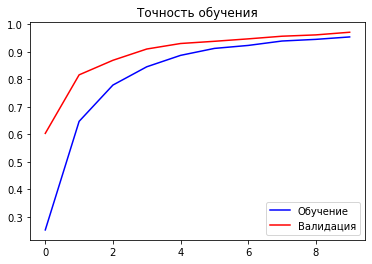

In [ ]:
plot_scores(history)

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
train_loss
val_loss

[1.3989524841308594,
 0.7918080687522888,
 0.5714329481124878,
 0.43637874722480774,
 0.35004639625549316,
 0.300881952047348,
 0.2562715709209442,
 0.23173899948596954,
 0.20420429110527039,
 0.17826524376869202]

In [ ]:
np.argmin(val_loss)

9

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/fruits-360-original-size/fruits-360-original-size/Test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names_test = test_ds.class_names
num_classes = len(class_names)

Found 3110 files belonging to 24 classes.


In [ ]:
scores = model.evaluate(test_ds)

98/98 [==============================] - 5s 52ms/step - loss: 0.1635 - accuracy: 0.9778


In [ ]:
print('Test loss ', scores[0])
print('Test accuracy ', scores[1])

Test loss  0.1635340005159378
Test accuracy  0.9778134822845459


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(image_batch)

1/1 [==============================] - 1s 924ms/step


In [ ]:
predictions[0]

array([7.8094772e-08, 2.4814051e-08, 7.9737150e-09, 9.9662435e-01,
       3.8077708e-06, 5.8387715e-05, 6.3372156e-08, 2.8360793e-03,
       3.3367080e-08, 1.0723715e-07, 2.1373128e-06, 5.7004190e-06,
       9.9134594e-09, 4.3214102e-05, 1.7428551e-05, 5.0797951e-08,
       1.8569704e-06, 2.0551083e-06, 8.9604998e-07, 2.8423648e-07,
       4.6634948e-05, 3.4406252e-04, 1.2665847e-05, 1.7346881e-07],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
labels_batch[0]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(24))
  plt.yticks([])
  thisplot = plt.bar(range(24), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
for image_batch1, labels_batch1 in test_ds.take(1):
    print(image_batch1.shape)
    print(labels_batch1.shape)

(32, 100, 100, 3)
(32,)


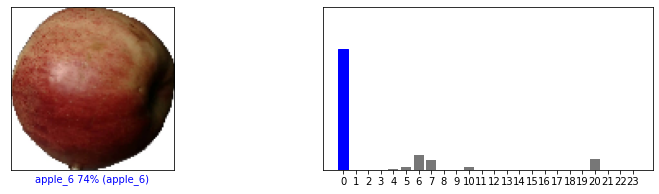

In [ ]:
i = 20
plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Labels_test, Images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Labels_test)
plt.show()

In [ ]:
image_batch = image_batch / 255.0

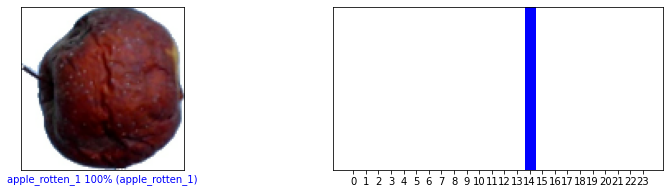

In [ ]:
i = 12
plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], labels_batch, image_batch)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  labels_batch)
plt.show()

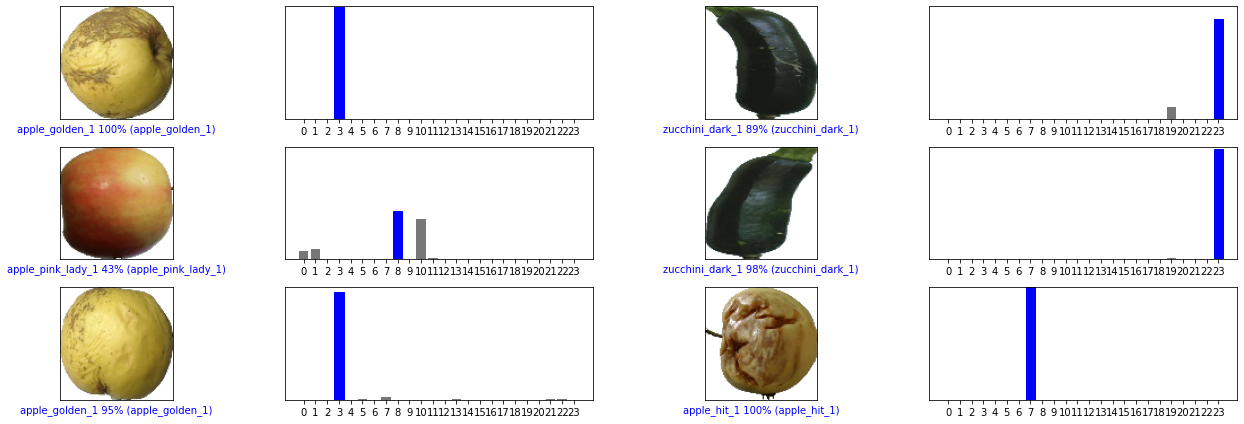

In [ ]:
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(3*3*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], labels_batch, image_batch)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], labels_batch)
plt.tight_layout()
plt.show()

In [ ]:
img = image_batch[1]

print(img.shape)

(100, 100, 3)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 100, 100, 3)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 2s 2s/step
[[0.00960526 0.0235496  0.00248701 0.00596331 0.00248272 0.00401981
  0.07483943 0.0126677  0.02938279 0.01047795 0.02407487 0.22262032
  0.09339739 0.00442285 0.0099761  0.00960688 0.09339521 0.01886531
  0.17863618 0.06106521 0.01411358 0.0095847  0.01020618 0.07455972]]


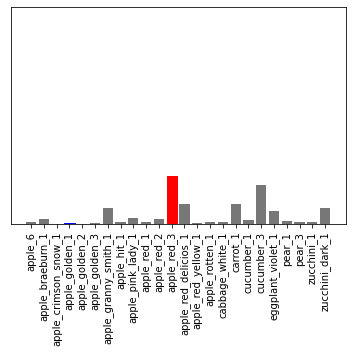

In [ ]:
plot_value_array(0, predictions_single[0], labels_batch)
_ = plt.xticks(range(24), class_names, rotation=90)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

11

In [ ]:
from PIL import Image
from skimage.io import imread

def predict(file_name):
    img = Image.open(file_name)
    img = img.convert("RGB")
    img = img.resize((100, 100))
    img.save(file_name)

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")

    img = imread(file_name)
    img = tf.keras.applications.densenet.preprocess_input(img)
    img = tf.expand_dims(img, axis=0)
    probs = model.predict(img)
    for idx in probs.argsort()[0][::-1][:2]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", name_classes[idx])

def download_and_predict(url, file_name):
    os.system("curl -s {} -o {}".format(url, file_name))
    predict(file_name)

1/1 [==============================] - 1s 842ms/step
6.06% 	 pear_3
-16.08% 	 zucchini_1


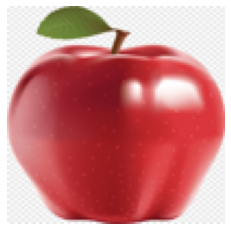

In [ ]:
download_and_predict("https://w7.pngwing.com/pngs/723/999/png-transparent-red-apple-illustration-ipod-touch-apple-icon-format-icon-red-apple-natural-foods-food-image-file-formats.png", "apple_red_delicios_1.jpg")

1/1 [==============================] - 0s 31ms/step
-36.08% 	 zucchini_1
-54.83% 	 cabbage_white_1


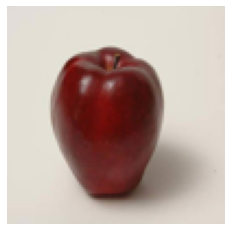

In [ ]:
download_and_predict("https://img.21food.com/20110609/product/1306988326910.jpg","apple_red_delicios_1.jpg")

1/1 [==============================] - 0s 24ms/step
-67.36% 	 apple_golden_1
-79.04% 	 pear_1


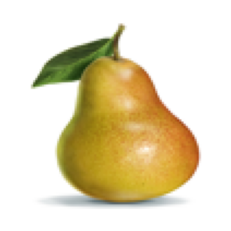

In [ ]:
download_and_predict("https://rusinfo.info/wp-content/uploads/e/3/7/e37c093de9974f20b04c88c767a9c58d.jpg","pear.jpg")

1/1 [==============================] - 0s 28ms/step
-32.91% 	 cabbage_white_1
-51.63% 	 zucchini_1


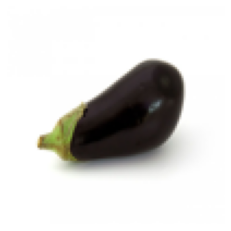

In [ ]:
download_and_predict("https://c.pxhere.com/photos/72/87/aubergine_brinjal_eggplant_vegetable_purple_culinary_raw-1136506.jpg!d","zucchini.jpg")